In [1]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

In [2]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

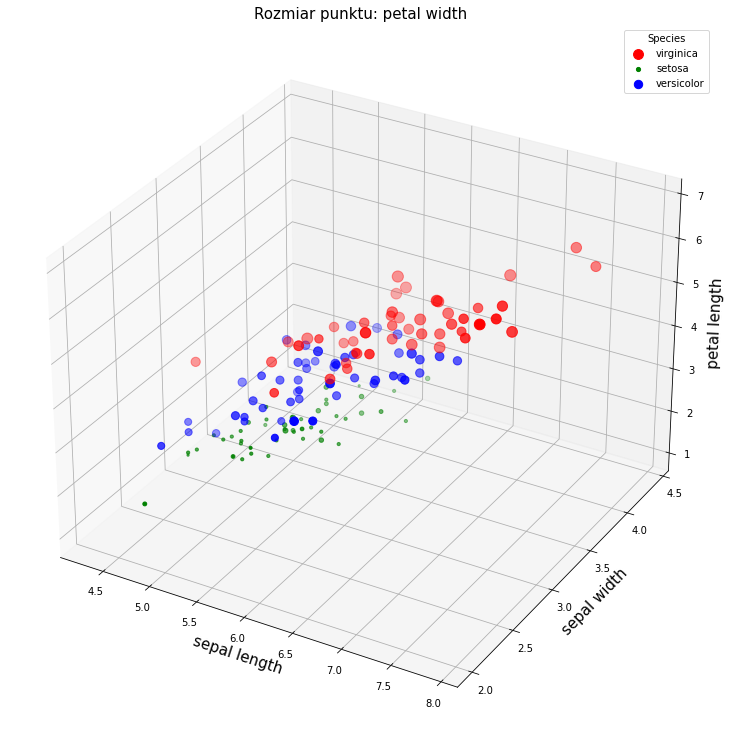

In [5]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=iris.loc[iris['species']=='virginica', 'sepal_length'],
                 ys=iris.loc[iris['species']=='virginica','sepal_width'],
                 zs=iris.loc[iris['species']=='virginica', 'petal_length'],
                 s=iris.loc[iris['species']=='virginica','petal_width']*50,
                 c='red', label='virginica')
img = ax.scatter(xs=iris.loc[iris['species']=='setosa', 'sepal_length'],
                 ys=iris.loc[iris['species']=='setosa','sepal_width'],
                 zs=iris.loc[iris['species']=='setosa', 'petal_length'],
                 s=iris.loc[iris['species']=='setosa','petal_width']*50,
                 c='green', label='setosa')
img = ax.scatter(xs=iris.loc[iris['species']=='versicolor', 'sepal_length'],
                 ys=iris.loc[iris['species']=='versicolor','sepal_width'],
                 zs=iris.loc[iris['species']=='versicolor', 'petal_length'],
                 s=iris.loc[iris['species']=='versicolor','petal_width']*50,
                 c='blue', label='versicolor')
ax.set_xlabel(xlabel='sepal length', size=15)
ax.set_ylabel(ylabel='sepal width', size=15)
ax.set_zlabel(zlabel='petal length', size=15)
ax.set_title('Rozmiar punktu: petal width', size=15)
plt.legend(title='Species')
plt.show()

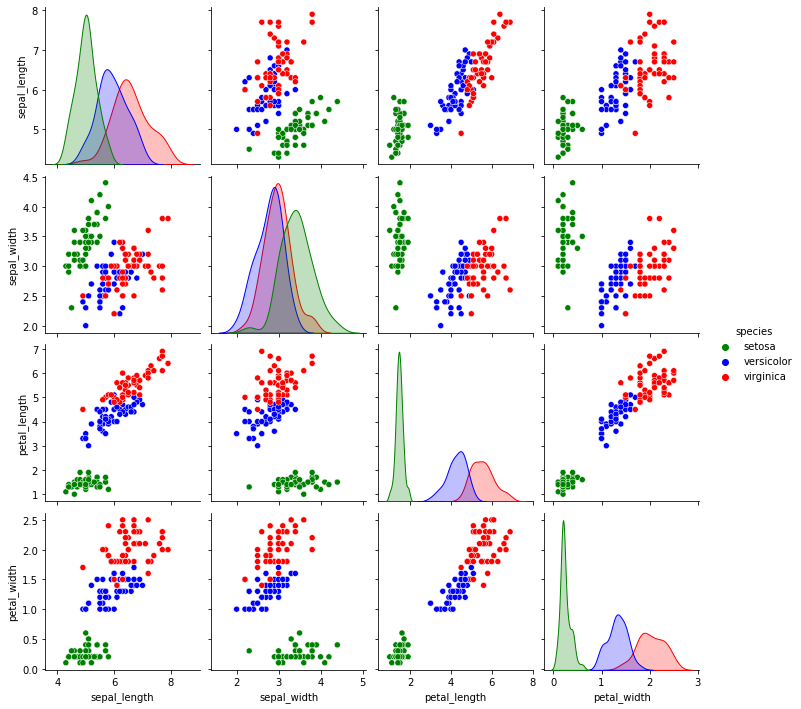

In [6]:
sns.pairplot(iris,
             hue='species',
             palette={'virginica': 'red', 'setosa': 'green', 'versicolor': 'blue'})
plt.show()

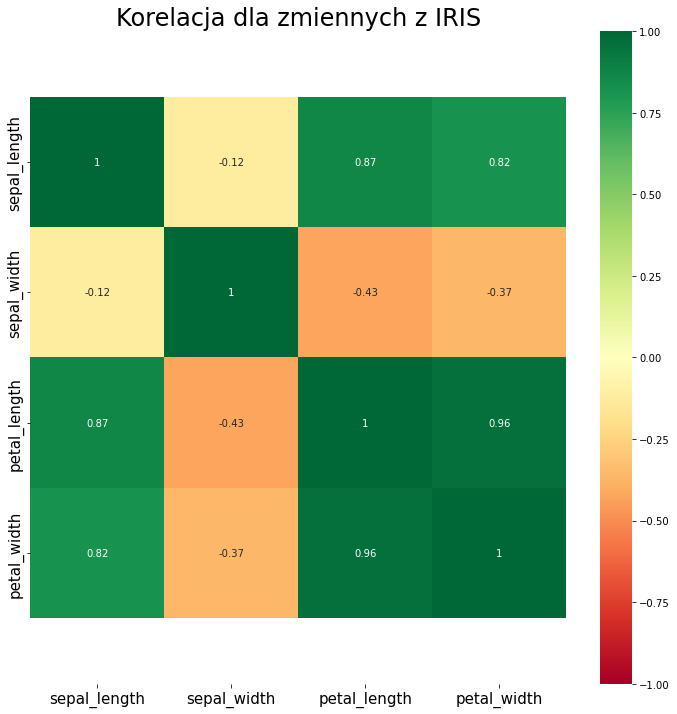

In [7]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(iris.corr(),
                 xticklabels=iris.corr().columns,
                 yticklabels=iris.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych z IRIS', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = iris.drop('species', axis=1).copy()
y = iris['species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_iris = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_iris.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'species'},
                  inplace=True)
train_iris[['PC1', 'PC2','PC3','PC4']] = train_iris[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_iris.corr()

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,-3.340737e-17,2.459984e-18,2.671238e-17
PC2,-3.340737e-17,1.000000e+00,2.739344e-16,-1.350793e-16
PC3,2.459984e-18,2.739344e-16,1.000000e+00,8.728223e-17
PC4,2.671238e-17,-1.350793e-16,8.728223e-17,1.000000e+00


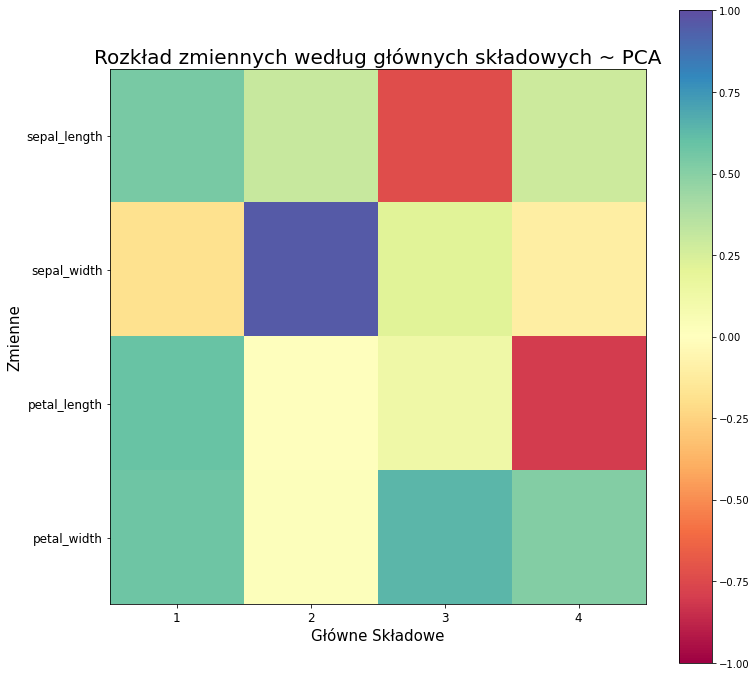

In [11]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

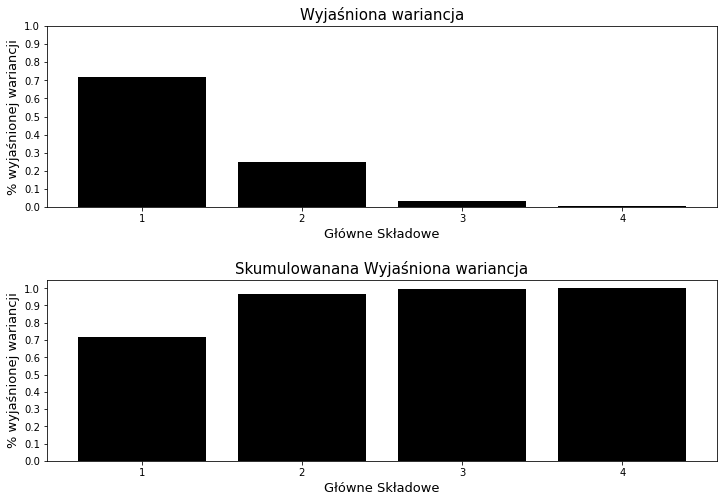

Główna składowa: 1, Wyjaśniona wariancja: 0.71702, Skumulowana Wyjaśniona wariancja: 0.71702
Główna składowa: 2, Wyjaśniona wariancja: 0.24713, Skumulowana Wyjaśniona wariancja: 0.96415
Główna składowa: 3, Wyjaśniona wariancja: 0.03156, Skumulowana Wyjaśniona wariancja: 0.99572
Główna składowa: 4, Wyjaśniona wariancja: 0.00428, Skumulowana Wyjaśniona wariancja: 1.0


In [12]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

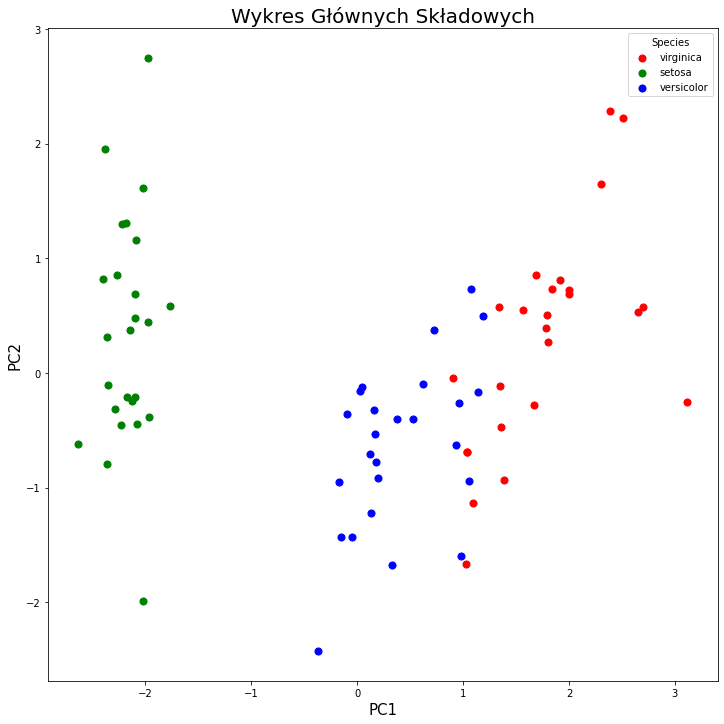

In [13]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(x=train_iris.loc[train_iris['species']=='virginica', 'PC1'],
            y=train_iris.loc[train_iris['species']=='virginica','PC2'],
            c='red', label='virginica', s=50)
plt.scatter(x=train_iris.loc[train_iris['species']=='setosa', 'PC1'],
            y=train_iris.loc[train_iris['species']=='setosa','PC2'],
            c='green', label='setosa', s=50)
plt.scatter(x=train_iris.loc[train_iris['species']=='versicolor', 'PC1'],
            y=train_iris.loc[train_iris['species']=='versicolor','PC2'],
            c='blue', label='versicolor', s=50)
plt.xlabel(xlabel='PC1', size=15)
plt.ylabel(ylabel='PC2', size=15)
plt.title('Wykres Głównych Składowych', size=20)
plt.legend(title='Species')
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
import datetime

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = PrettyTable(['Model',
                       'Dokładność',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieprzetworzonym zbiorze
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

# Trenowanie modelu na przetworzonym zbiorze
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1]])

# Trenowanie modelu na czterech Głównych Składowych
PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1]])

# Trenowanie modelu na trzech Głównych Składowych
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])

# Trenowanie modelu na dwóch Głównych Składowych
PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1]])

# Trenowanie modelu na jednej Głównej Składowej
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1],  y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])
print(results)

+-------------------+------------+--------------------------------+
|       Model       | Dokładność | Czas trenowania (microseconds) |
+-------------------+------------+--------------------------------+
| Nieskalowane dane |   0.9467   |             434659             |
|   Skalowane dane  |   0.9467   |              4983              |
|        4 PC       |   0.9467   |              5038              |
|        3 PC       |   0.9467   |              9178              |
|        2 PC       |   0.9067   |              3990              |
|        1 PC       |   0.9067   |              3025              |
+-------------------+------------+--------------------------------+
